# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [138]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [142]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=fc1dbb4c6f21d918da1db5652ebf2a22"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=fc1dbb4c6f21d918da1db5652ebf2a22"
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city.replace(' ', '-')}&appid=fc1dbb4c6f21d918da1db5652ebf2a22"
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        print(city_weather)


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=baker-city&appid=fc1dbb4c6f21d918da1db5652ebf2a22
Processing Record 1 of Set 1 | baker city
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=ko-pha-ngan&appid=fc1dbb4c6f21d918da1db5652ebf2a22
Processing Record 2 of Set 1 | ko pha ngan
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=buala&appid=fc1dbb4c6f21d918da1db5652ebf2a22
Processing Record 3 of Set 1 | buala
{'coord': {'lon': 159.5921, 'lat': -8.145}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.98, 'feels_like': 302.77, 'temp_min': 299.98, 'temp_max': 299.98, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 5620, 'wind': {'speed': 2.41, 'deg': 112, 'gust': 3.2

In [150]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          461
Lat           461
Lng           461
Max Temp      461
Humidity      461
Cloudiness    461
Wind Speed    461
Country       461
Date          461
dtype: int64

In [151]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [152]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.1450,159.5921,299.98,83,95,2.41,SB,1729976721
1,haiku-pauwela,20.9219,-156.3051,299.40,83,75,10.73,US,1729976722
2,byelaazyorsk,52.4731,25.1784,279.95,75,7,2.17,BY,1729976724
3,iqaluit,63.7506,-68.5145,272.00,80,75,3.60,CA,1729976726
4,waitangi,-43.9535,-176.5597,288.05,98,100,4.47,NZ,1729976729


In [153]:
print(weather_data)

       city       lat      temp
0  Ellipsis  Ellipsis  Ellipsis


In [154]:
print(weather_data.dtypes)

city    object
lat     object
temp    object
dtype: object


In [155]:
print(city_data_df.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

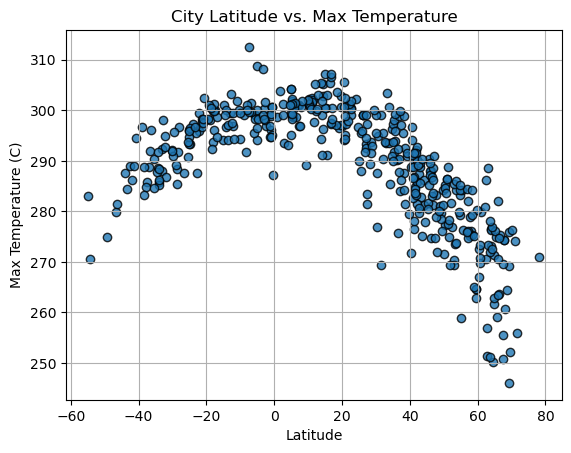

In [95]:



# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k", alpha=0.8)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

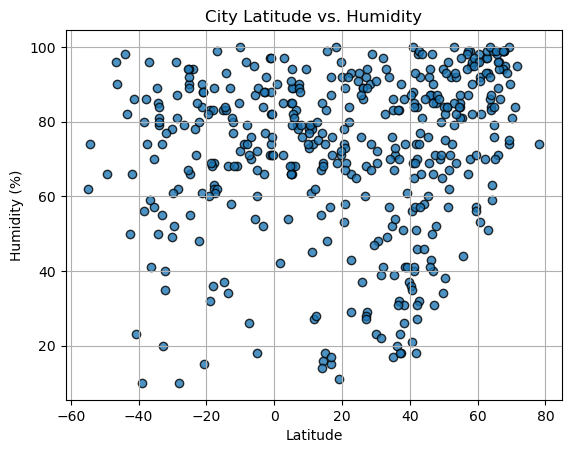

In [97]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

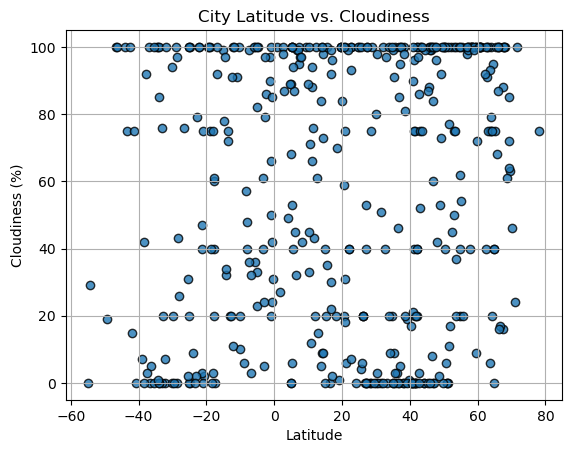

In [99]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

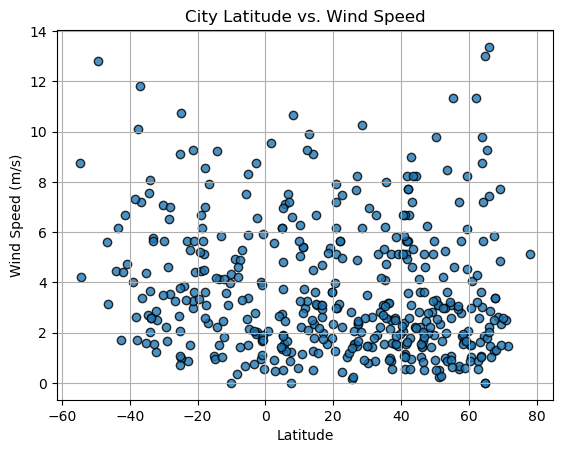

In [101]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coords):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plotting
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, text_coords, fontsize=15, color="red")
    plt.grid(True)
    plt.show()
    
    # Return r-value for further analysis
    return r_value

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0] # YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,255.56,99,88,1.29,RU,1729973378
1,saipan,15.1355,145.7010,300.54,83,20,3.09,MP,1729973379
2,longyearbyen,78.2186,15.6401,271.06,74,75,5.14,SJ,1729973382
4,klyuchi,52.2667,79.1667,281.64,92,100,4.21,RU,1729973389
5,kolonia,50.9333,6.9500,286.41,84,0,3.09,DE,1729973152


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,carnarvon,-24.8667,113.6333,293.34,66,0,10.75,AU,1729973388
7,grytviken,-54.2811,-36.5092,270.57,74,29,4.22,GS,1729973392
10,port-aux-francais,-49.3500,70.2167,274.95,66,19,12.82,TF,1729973397
17,kirakira,-10.4544,161.9205,300.00,85,100,3.97,SB,1729973407
19,dolores,-36.3132,-57.6792,296.05,41,5,3.39,AR,1729973409


###  Temperature vs. Latitude Linear Regression Plot

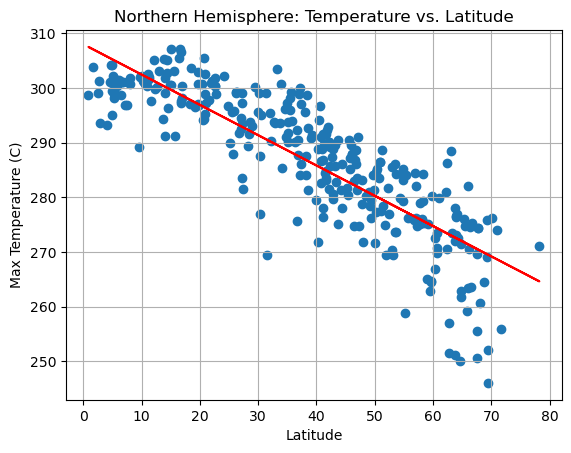

R-squared: 0.72


In [109]:
# Linear regression on Northern Hemisphere
northern_r_value_temp = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
    "Northern Hemisphere: Temperature vs. Latitude",
    "Latitude", "Max Temperature (C)", (5, -20)
)
print(f"R-squared: {northern_r_value_temp**2:.2f}")

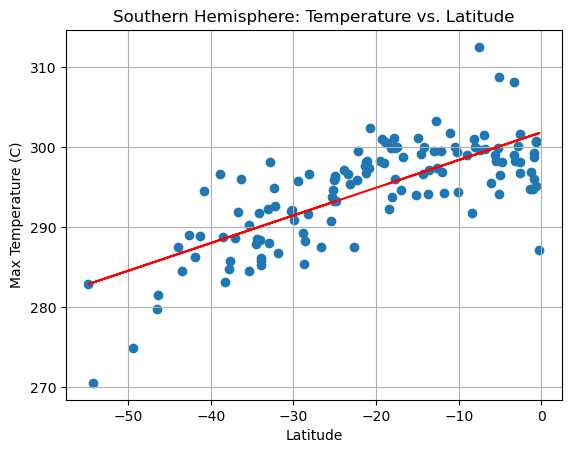

R-squared: 0.54


In [111]:
# Linear regression on Southern Hemisphere
southern_r_value_temp = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
    "Southern Hemisphere: Temperature vs. Latitude",
    "Latitude", "Max Temperature (C)", (-55, 30)
)
print(f"R-squared: {southern_r_value_temp**2:.2f}")

**Discussion about the linear relationship:**  Temperature tends to decrease as latitude increases in both hemispheres, suggesting a strong negative correlation between latitude and temperature in the Northern Hemisphere and a positive correlation in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

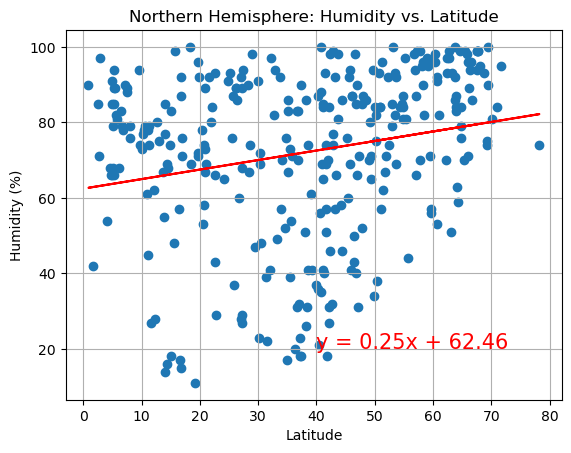

R-squared: 0.05


In [113]:
northern_r_value_humidity = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
    "Northern Hemisphere: Humidity vs. Latitude",
    "Latitude", "Humidity (%)", (40, 20)
)
print(f"R-squared: {northern_r_value_humidity**2:.2f}")


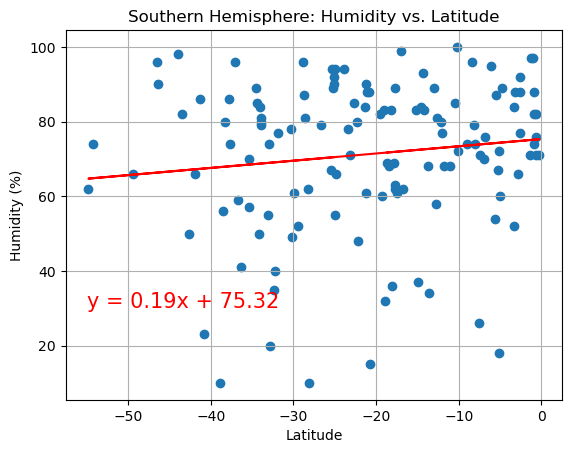

R-squared: 0.02


In [115]:
# Southern Hemisphere
southern_r_value_humidity = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
    "Southern Hemisphere: Humidity vs. Latitude",
    "Latitude", "Humidity (%)", (-55, 30)
)
print(f"R-squared: {southern_r_value_humidity**2:.2f}")

**Discussion about the linear relationship:** Humidity does not show a consistent correlation with latitude, as different climates can affect humidity regardless of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

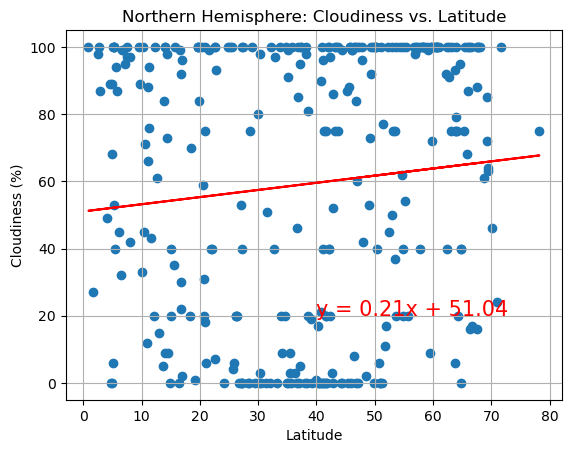

R-squared: 0.01


In [124]:
# Northern Hemisphere
northern_r_value_clouds = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
    "Northern Hemisphere: Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)", (40, 20)
)
print(f"R-squared: {northern_r_value_clouds**2:.2f}")

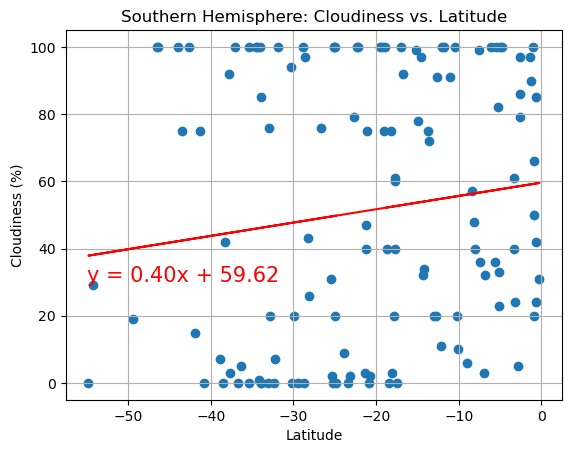

R-squared: 0.02


In [126]:
# Southern Hemisphere
southern_r_value_clouds = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
    "Southern Hemisphere: Cloudiness vs. Latitude",
    "Latitude", "Cloudiness (%)", (-55, 30)
)
print(f"R-squared: {southern_r_value_clouds**2:.2f}")

**Discussion about the linear relationship:** Cloudiness does not appear to have a strong linear relationship with latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

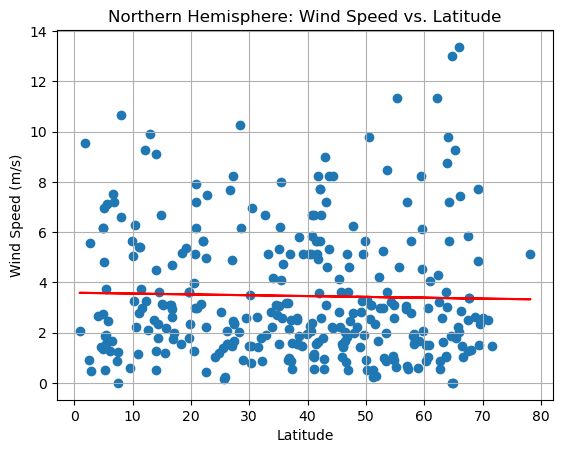

R-squared: 0.00


In [130]:
# Northern Hemisphere
northern_r_value_wind = plot_linear_regression(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
    "Northern Hemisphere: Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (m/s)", (40, 20)
)
print(f"R-squared: {northern_r_value_wind**2:.2f}")

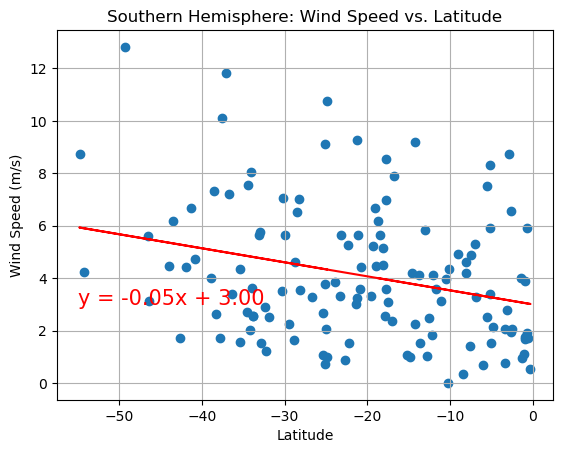

R-squared: 0.08


In [132]:
# Southern Hemisphere
southern_r_value_wind = plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
    "Southern Hemisphere: Wind Speed vs. Latitude",
    "Latitude", "Wind Speed (m/s)", (-55, 3)
)
print(f"R-squared: {southern_r_value_wind**2:.2f}")


**Discussion about the linear relationship:** Wind speed does not show a strong correlation with latitude, indicating that local geography and other factors likely have a larger impact on wind speed.